In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """""
    Analiza y visualiza la relación entre variables numéricas y un target 
    mediante filtros estadísticos de correlación y significancia.
    """
    
    # 1: VALIDACIÓN DE INTEGRIDAD DE DATOS
    # Comprobamos que el dataframe existe y el target es válido para regresión

    if not isinstance(df, pd.DataFrame):
        print("Error: 'df' debe ser un DataFrame.")
        return None
    
    if target_col not in df.columns or not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: '{target_col}' debe ser una columna numérica del dataframe.")
        return None
    
    # 2: SELECCIÓN ESTRATÉGICA DE COLUMNAS
    # Si la lista viene vacía, tomamos todas las numéricas por defecto

    if len(columns) == 0:
        columns = df.select_dtypes(include=['number']).columns.tolist()
        if target_col in columns: columns.remove(target_col)
    else:
        # Si hay lista, filtramos solo las que realmente existen y son numéricas
        columns = [c for c in columns if c in df.columns and pd.api.types.is_numeric_dtype(df[c]) and c != target_col]

    # 3: FILTRADO ESTADÍSTICO (CORRELACIÓN Y P-VALUE)
    selected_columns = []
    # Eliminamos nulos para el cálculo estadístico (crítico en datasets como Titanic)
    df_clean = df.dropna(subset=[target_col] + columns) 

    for col in columns:
        # Calculamos correlación de Pearson y su nivel de confianza (p-value)
        corr_val, p_val = pearsonr(df_clean[col], df_clean[target_col])
        
        # Filtro de fuerza: ¿La relación es lo suficientemente fuerte?
        if abs(corr_val) > umbral_corr:
            # Filtro de confianza: ¿La relación es estadísticamente significativa?
            if pvalue is None or p_val < pvalue:
                selected_columns.append(col)

    # Si tras los filtros no queda nada, avisamos al usuario
    if not selected_columns:
        print("No se encontraron variables que superen los umbrales estadísticos establecidos.")
        return []

    # 4: VISUALIZACIÓN DINÁMICA (MAX 5 VARS POR GRÁFICO)
    # Para evitar gráficos ilegibles, dividimos la lista en grupos de 4 + target
    max_vars = 4 
    for i in range(0, len(selected_columns), max_vars):
        chunk = selected_columns[i : i + max_vars]
        cols_to_plot = [target_col] + chunk
        
        # Generamos el pairplot (gráficos de dispersión y distribuciones)
        sns.pairplot(df[cols_to_plot], diag_kind='kde', corner=True)
        plt.suptitle(f"Análisis de Correlación: {chunk}", y=1.02)
        plt.show()

    return selected_columns

--- Iniciando análisis del Titanic ---



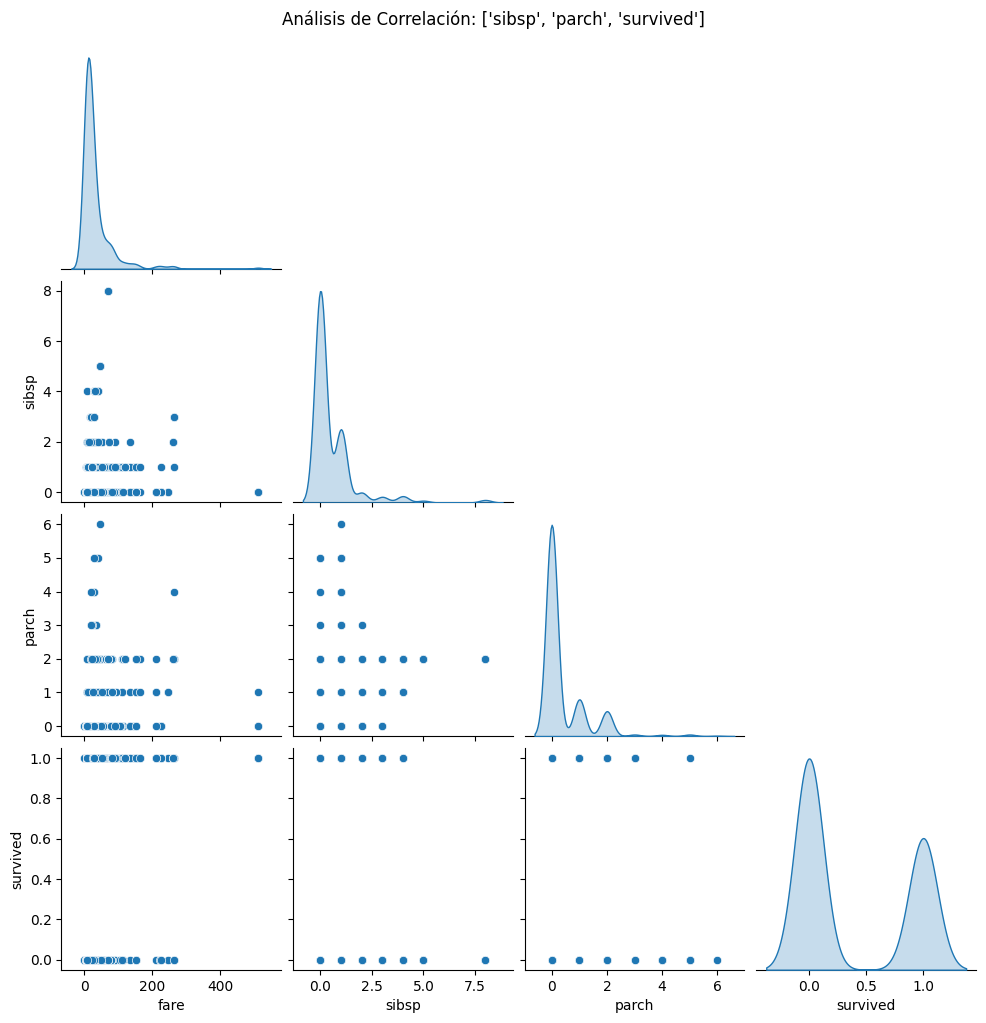


Las columnas que pasaron el filtro estadístico son: ['sibsp', 'parch', 'survived']


In [14]:

# 1. Cargamos el dataset del Titanic
titanic = sns.load_dataset('titanic')

# 2. Definimos los parámetros de prueba
# Queremos ver qué variables afectan al precio del billete ('fare')
# Usamos un umbral de correlación de 0.1 y un p-value de 0.05
target = "fare"
cols_analizar = ["age", "sibsp", "parch", "survived"] # Variables numéricas

print("--- Iniciando análisis del Titanic ---\n")

# 3. Llamada a la función
columnas_relevantes = plot_features_num_regression(
    df=titanic, 
    target_col=target, 
    columns=cols_analizar, 
    umbral_corr=0.1, 
    pvalue=0.05
)

# 4. Ver el valor de retorno
print(f"\nLas columnas que pasaron el filtro estadístico son: {columnas_relevantes}")